In [2]:
import numpy as np
import pandas as pd

# 1、加载数据

In [3]:
Molecular_Descriptor = pd.read_excel('./Molecular_Descriptor.xlsx',sheet_name='training')
Molecular_Descriptor

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,...,598.166139,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,...,436.098059,64.171346,2.070043,19.841924,16.326873,0.000000,2583,50,0.782,174


In [4]:
ERα_activity = pd.read_excel('./ERα_activity.xlsx',sheet_name='training')
ERα_activity

,SMILES,IC50_nM,pIC50
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,2.5,8.602060
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,7.5,8.124939
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,3.1,8.508638
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,3.9,8.408935
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,7.4,8.130768
...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,738.0,6.131944
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,1410.0,5.850781
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,19.0,7.721246
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,13.0,7.886057


In [5]:
ADMET = pd.read_excel('./ADMET.xlsx',sheet_name='training')
ADMET

,SMILES,Caco-2,CYP3A4,hERG,HOB,MN
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,1,1,0,0
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,1,1,0,0
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,1,1,0,1
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,1,1,0,0
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1,1,0,0
...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,0,1,1,0,1
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,0,1,1,0,1
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,0,1,0,0,1
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,0,1,0,0,1


合并数据

In [6]:
data = pd.merge(pd.merge(Molecular_Descriptor,ERα_activity),ADMET)
data.head()

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WPOL,XLogP,Zagreb,IC50_nM,pIC50,Caco-2,CYP3A4,hERG,HOB,MN
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,47,4.666,166,2.5,8.602060,0,1,1,0,0
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,54,5.804,174,7.5,8.124939,0,1,1,0,0
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,52,2.964,176,3.1,8.508638,0,1,1,0,1
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,50,6.015,174,3.9,8.408935,0,1,1,0,0
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,50,4.462,174,7.4,8.130768,0,1,1,0,0


pIC50处于什么范围时，才算是化合物对抑制ERα具有更好的生物活性？

假设pIC50>均值，其生物活性好，令pIC50=1，否则为0（连续变量转化为二分类变量，以前在电影评分预测中做过，令评分大于3的标签为1）

In [7]:
data['pIC50'] = [1 if x>np.mean(data['pIC50']) else 0 for x in data['pIC50']]

要求化合物生物活性好且满足ADMET性质中的其中三个

In [8]:
data['hERG_'] = [1 if x==0 else 0 for x in data.hERG]
data['MN_'] = [1 if x==0 else 0 for x in data.MN]

In [9]:
data.columns

Index(['SMILES', 'nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom',
       'nAromBond', 'nAtom', 'nHeavyAtom',
       ...
       'Zagreb', 'IC50_nM', 'pIC50', 'Caco-2', 'CYP3A4', 'hERG', 'HOB', 'MN',
       'hERG_', 'MN_'],
      dtype='object', length=739)

In [10]:
data['label'] = data['Caco-2']+data['CYP3A4']+data['hERG_']+data['HOB']+data['MN_']

In [11]:
data['label']=[1 if x>2 else 0 for x in data.label]

In [12]:
data['label'] = data['label']+data['Caco-2']
data['label'] = [1 if x==2 else 0 for x in data.label]

In [13]:
data['label'].value_counts()  #样本不均衡

0    1438
1     536
Name: label, dtype: int64

In [14]:
data_ = data

In [15]:
data_ = data_.drop(['SMILES','IC50_nM', 'pIC50', 'Caco-2', 'CYP3A4', 'hERG', 'HOB', 'MN','hERG_', 'MN_'],axis=1)
data_.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,label
0,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,...,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166,0
1,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,...,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174,0
2,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,...,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176,0
3,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174,0
4,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174,0


# 2、数据清洗
删除单一值的列，删除样本分布极不平衡的列

In [16]:
dele_list = []
for col in data_.columns:
    if len(data_[col].unique())<5:
        if data_[col].value_counts().max()/len(data_) >= 0.9:
            dele_list.append(col)
data_ = data_.drop(dele_list,axis=1)
data_.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,label
0,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,...,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166,0
1,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,...,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174,0
2,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,...,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176,0
3,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174,0
4,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174,0


In [39]:
data_['label'].value_counts()

0    1438
1     536
Name: label, dtype: int64

In [62]:
# 离散变量与连续变量区分
def category_continue_separation(df, feature_names):
    categorical_var = []  # 离散特征
    numerical_var = []  # 连续特征

    if 'label' in feature_names:
        feature_names.remove('label')  # 标签从特征中去除

    # 先判断类型，如果是int或float就直接作为连续变量
    numerical_var = list(df[feature_names].select_dtypes(
        include=['int', 'float', 'int32', 'float32', 'int64', 'float64']).columns)

    categorical_var = [x for x in feature_names if x not in numerical_var]

    return categorical_var, numerical_var

categorical_var, numerical_var = category_continue_separation(data_,list(data_.columns))
categorical_var, numerical_var

([],
 ['nAcid',
  'ALogP',
  'ALogp2',
  'AMR',
  'apol',
  'naAromAtom',
  'nAromBond',
  'nAtom',
  'nHeavyAtom',
  'nH',
  'nC',
  'nN',
  'nO',
  'nS',
  'nF',
  'nCl',
  'nX',
  'ATSc1',
  'ATSc2',
  'ATSc3',
  'ATSc4',
  'ATSc5',
  'ATSm1',
  'ATSm2',
  'ATSm3',
  'ATSm4',
  'ATSm5',
  'ATSp1',
  'ATSp2',
  'ATSp3',
  'ATSp4',
  'ATSp5',
  'nBase',
  'BCUTw-1l',
  'BCUTw-1h',
  'BCUTc-1l',
  'BCUTc-1h',
  'BCUTp-1l',
  'BCUTp-1h',
  'nBonds',
  'nBonds2',
  'nBondsS',
  'nBondsS2',
  'nBondsS3',
  'nBondsD',
  'nBondsD2',
  'nBondsM',
  'bpol',
  'C1SP2',
  'C2SP2',
  'C3SP2',
  'C1SP3',
  'C2SP3',
  'C3SP3',
  'C4SP3',
  'SCH-4',
  'SCH-5',
  'SCH-6',
  'SCH-7',
  'VCH-4',
  'VCH-5',
  'VCH-6',
  'VCH-7',
  'SC-3',
  'SC-4',
  'SC-5',
  'SC-6',
  'VC-3',
  'VC-4',
  'VC-5',
  'VC-6',
  'SPC-4',
  'SPC-5',
  'SPC-6',
  'VPC-4',
  'VPC-5',
  'VPC-6',
  'SP-0',
  'SP-1',
  'SP-2',
  'SP-3',
  'SP-4',
  'SP-5',
  'SP-6',
  'SP-7',
  'VP-0',
  'VP-1',
  'VP-2',
  'VP-3',
  'VP-4',
  

In [64]:
#进一步在连续变量中提取变量取值小于10的变量
for s in numerical_var:
    if data_[s].nunique() <= 10:
        categorical_var.append(s)
        numerical_var.remove(s)
        #同时将后加的数值变量转变为字符串
        data_[s] = data_[s].astype('str')

categorical_var

['nAcid',
 'nS',
 'nCl',
 'nBase',
 'C3SP2',
 'C3SP3',
 'SCH-4',
 'nHBint4',
 'nHsOH',
 'nHssNH',
 'nHAvin',
 'ndsCH',
 'naaaC',
 'nsNH2',
 'naaN',
 'nsOH',
 'nssO',
 'nsF',
 'nsCl',
 'SsI',
 'minsI',
 'ETA_dPsi_B',
 'ETA_Beta_ns_d',
 'nRing',
 'n6Ring',
 'nF9Ring',
 'nFG12Ring',
 'nT5Ring',
 'nT9Ring',
 'nTG12Ring',
 'LipinskiFailures']


400多个变量太多了，是否应该先进行变量选择后，再进行变量分箱？

# 3、变量选择

In [65]:
#划分训练集和测试集：设定stratify=data_.label，则训练集和测试集种正负样本比例一致
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_,test_size=0.2,stratify=data_.label,random_state=25)

In [66]:
data_train.shape, data_test.shape

((1579, 443), (395, 443))

In [67]:
np.sum(data_train.label==0)/len(data_train),np.sum(data_test.label==0)/len(data_test)

(0.7283090563647878, 0.7291139240506329)

In [68]:
x_train = data_train.iloc[:,:-1]
x_test = data_test.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
y_test = data_test.iloc[:,-1]

### 随机森林

In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)  
model.fit(x_train,y_train) 
model.score(x_train,y_train) 

0.9418575297456167

In [70]:
model.score(x_test,y_test)  #严重过拟合，测试集上准确率也太低了

0.5755544522326065

### 逻辑回归

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train) 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [24]:
#模型评分
model.score(x_test,y_test) 

0.8329113924050633

In [25]:
#模型系数
importances = model.coef_
importances

array([[-3.30614966e-04,  3.13129507e-04,  3.16002587e-03,
         8.10465425e-04,  1.45638630e-03, -3.86877689e-03,
        -4.57317290e-03,  1.84131167e-03,  1.31733317e-04,
         1.70957835e-03, -1.01123118e-04,  2.47684957e-04,
        -3.32817530e-04, -1.37040800e-04, -3.05356408e-05,
         6.22440867e-04,  4.73809570e-04,  1.40174691e-04,
        -9.46240583e-05,  6.49053933e-06,  5.31666762e-05,
         1.66773212e-07, -2.07569508e-03,  2.71981952e-05,
        -1.12886727e-03,  1.66871309e-03,  1.29678685e-03,
         8.97181315e-05, -7.85522293e-03,  3.24637541e-03,
         1.58613181e-03, -5.81225912e-04,  3.83425392e-04,
        -5.09816675e-04, -4.66073645e-04,  5.66458580e-05,
         2.18345970e-05,  3.50572646e-04, -2.20973384e-04,
        -5.43319929e-04,  1.16625842e-03,  1.55935025e-03,
         4.34615268e-03,  2.63657432e-03, -3.95210257e-04,
         1.39116022e-03, -3.17989425e-03,  4.73613968e-03,
         8.76219853e-04, -2.26364330e-03, -1.25405667e-0

In [26]:
im = pd.DataFrame(importances[0],columns=['importance'])
im

,importance
0,-0.000331
1,0.000313
2,0.003160
3,0.000810
4,0.001456
...,...
437,0.001027
438,-0.003172
439,0.001127
440,0.001388


In [27]:
im['feature'] = list(x_train.columns)
im = im.sort_values(by='importance',ascending=False)
im

,importance,feature
430,0.020252,VABC
186,0.012055,SdO
187,0.009629,SssO
308,0.008757,maxdO
247,0.008687,mindO
...,...,...
149,-0.008015,SHBint10
246,-0.009236,minsOH
307,-0.009579,maxsOH
185,-0.020730,SsOH


In [28]:
im['importance_'] = np.abs(im['importance'])
im['importance_']

430    0.020252
186    0.012055
187    0.009629
308    0.008757
247    0.008687
         ...   
149    0.008015
246    0.009236
307    0.009579
185    0.020730
429    0.031808
Name: importance_, Length: 442, dtype: float64

In [29]:
im = im.sort_values(by='importance_',ascending=False)
im[:20]

,importance,feature,importance_
429,-0.031808,TopoPSA,0.031808
185,-0.020730,SsOH,0.020730
430,0.020252,VABC,0.020252
186,0.012055,SdO,0.012055
187,0.009629,SssO,0.009629
307,-0.009579,maxsOH,0.009579
246,-0.009236,minsOH,0.009236
308,0.008757,maxdO,0.008757
247,0.008687,mindO,0.008687
149,-0.008015,SHBint10,0.008015


In [32]:
#选择特征重要性排名前20的特征进模型
data1 = data_[['TopoPSA','SsOH','VABC','SdO','SssO','maxsOH','minsOH','maxdO','mindO','SHBint10','ATSp2','ECCEN','minaaO','maxaaO','SHBa','SaaO',
       'MW','bpol','nAromBond','nBondsS2','label']]


data_train, data_test = train_test_split(data1,test_size=0.2,stratify=data1.label,random_state=25)
x_train = data_train.iloc[:,:-1]
x_test = data_test.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
y_test = data_test.iloc[:,-1]

In [33]:
model = LogisticRegression()
model.fit(x_train,y_train) 
#模型评估
model.score(x_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8329113924050633

取前十个进模型效果没有前20个效果好

# 4、建立评分卡模型

In [71]:
data1

,TopoPSA,SsOH,VABC,SdO,SssO,maxsOH,minsOH,maxdO,mindO,SHBint10,...,ECCEN,minaaO,maxaaO,SHBa,SaaO,MW,bpol,nAromBond,nBondsS2,label
0,67.23,9.968948,414.727478,0.000000,12.643198,9.968948,9.968948,0.000000,0.000000,0.000000,...,912,0.0,0.0,23.796984,0.0,439.218115,44.167831,12,56,0
1,67.23,10.058948,449.319447,0.000000,12.757888,10.058948,10.058948,0.000000,0.000000,0.000000,...,976,0.0,0.0,23.959452,0.0,467.249415,48.540659,12,62,0
2,87.46,19.730394,422.004313,0.000000,12.523175,9.977508,9.752886,0.000000,0.000000,9.842059,...,977,0.0,0.0,33.129664,0.0,463.181729,39.795003,18,48,0
3,67.23,10.025028,449.319447,0.000000,12.694039,10.025028,10.025028,0.000000,0.000000,0.000000,...,983,0.0,0.0,23.887967,0.0,467.249415,48.540659,12,62,0
4,67.23,9.993342,430.510071,0.000000,12.598855,9.993342,9.993342,0.000000,0.000000,0.000000,...,983,0.0,0.0,23.646726,0.0,461.202465,41.981417,18,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,119.90,19.671114,530.801600,27.694232,22.814865,9.862971,9.808143,13.847116,13.847116,17.160557,...,1471,0.0,0.0,70.180211,0.0,598.166139,46.936210,24,50,0
1970,141.90,39.000194,496.209630,27.506445,12.021002,9.829120,9.696786,13.753222,13.753222,17.177035,...,1338,0.0,0.0,78.527640,0.0,570.134839,38.731382,24,44,0
1971,141.90,38.871608,496.209630,27.318633,11.949576,9.815320,9.645181,13.659317,13.659317,23.334095,...,1415,0.0,0.0,78.139817,0.0,570.134839,38.731382,24,44,0
1972,101.44,19.375230,374.063593,26.522377,11.725393,9.706524,9.668706,13.261188,13.261188,17.182692,...,724,0.0,0.0,57.623000,0.0,436.098059,32.172140,18,34,0


### 变量分箱与编码
  首先，判断数据类型，如果是int或float，则为数值型特征，其余为离散变量；
  然后，在连续型变量中检查变量可能取值的个数，如果变量取值小于10，则认为该变量为离散型变量，不参与变量分箱，直接按照离散变量进行WOE编码。

In [77]:
# 离散变量与连续变量区分
def category_continue_separation(df, feature_names):
    categorical_var = []  # 离散特征
    numerical_var = []  # 连续特征

    if 'label' in feature_names:
        feature_names.remove('label')  # 标签从特征中去除

    # 先判断类型，如果是int或float就直接作为连续变量
    numerical_var = list(df[feature_names].select_dtypes(
        include=['int', 'float', 'int32', 'float32', 'int64', 'float64']).columns)

    categorical_var = [x for x in feature_names if x not in numerical_var]

    return categorical_var, numerical_var

categorical_var, numerical_var = category_continue_separation(data1,list(data1.columns))

In [79]:
categorical_var,numerical_var

([],
 ['TopoPSA',
  'SsOH',
  'VABC',
  'SdO',
  'SssO',
  'maxsOH',
  'minsOH',
  'maxdO',
  'mindO',
  'SHBint10',
  'ATSp2',
  'ECCEN',
  'minaaO',
  'maxaaO',
  'SHBa',
  'SaaO',
  'MW',
  'bpol',
  'nAromBond',
  'nBondsS2'])

In [80]:
#进一步在连续变量中提取变量取值小于10的变量
for s in numerical_var:
    if data1[s].nunique() <= 10:
        categorical_var.append(s)
        numerical_var.remove(s)
        #同时将后加的数值变量转变为字符串
        data1[s] = data1[s].astype('str')

In [81]:
categorical_var

[]

baseline：采用自动分箱的方式。分箱策略会影响计算结果。

In [73]:
data1.describe()  #变量特征不了解具体含义及其取值范围

,TopoPSA,SsOH,VABC,SdO,SssO,maxsOH,minsOH,maxdO,mindO,SHBint10,...,ECCEN,minaaO,maxaaO,SHBa,SaaO,MW,bpol,nAromBond,nBondsS2,label
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,...,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,73.976667,13.599358,352.259922,10.326996,4.970972,7.761552,7.527083,6.637688,6.481881,4.332829,...,708.618034,0.793413,0.795524,35.963448,0.838270,391.056697,30.610666,16.189463,36.105876,0.271530
std,44.585723,9.220378,113.371927,14.796880,5.789585,4.088165,3.969348,6.262580,6.117633,6.490648,...,517.764577,1.936071,1.941232,21.442667,2.104956,111.596103,13.202394,5.635271,18.015042,0.444861
min,12.470000,0.000000,182.547112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.487697,...,196.000000,0.000000,0.000000,-3.938214,0.000000,194.094294,9.079242,0.000000,10.000000,0.000000
25%,50.440000,9.384833,261.362900,0.000000,0.000000,9.325627,8.771516,0.000000,0.000000,0.000000,...,372.000000,0.000000,0.000000,24.260148,0.000000,303.981576,20.370510,12.000000,22.000000,0.000000
50%,66.490000,18.525659,346.737143,10.770586,5.086963,9.806279,9.460607,10.770586,10.713990,0.000000,...,626.000000,0.000000,0.000000,33.001139,0.000000,386.036615,30.268175,18.000000,35.000000,0.000000
75%,87.460000,19.722984,427.748517,12.942884,6.434813,10.023998,9.800436,12.571274,12.309301,9.495761,...,976.000000,0.000000,0.000000,43.558890,0.000000,463.195900,39.701417,18.000000,48.000000,1.000000
max,1207.820000,65.625326,2284.171248,283.941443,30.025129,12.470850,11.732336,14.964156,14.391175,113.567364,...,15308.000000,6.578309,6.578309,476.222559,16.880535,2349.392344,227.457260,34.000000,315.000000,1.000000


In [72]:
data1.columns

Index(['TopoPSA', 'SsOH', 'VABC', 'SdO', 'SssO', 'maxsOH', 'minsOH', 'maxdO',
       'mindO', 'SHBint10', 'ATSp2', 'ECCEN', 'minaaO', 'maxaaO', 'SHBa',
       'SaaO', 'MW', 'bpol', 'nAromBond', 'nBondsS2', 'label'],
      dtype='object')

In [74]:
data1['bin_TopoPSA'] = pd.qcut(data1['TopoPSA'],q=5,duplicates='drop').astype(str)
data1['bin_SsOH'] = pd.qcut(data1['SsOH'],q=5,duplicates='drop').astype(str)
data1['bin_VABC'] = pd.qcut(data1['VABC'],q=5,duplicates='drop').astype(str)
data1['bin_SdO'] = pd.qcut(data1['SdO'],q=5,duplicates='drop').astype(str)
data1['bin_SssO'] = pd.qcut(data1['SssO'],q=5,duplicates='drop').astype(str)
data1['bin_maxsOH'] = pd.qcut(data1['maxsOH'],q=5,duplicates='drop').astype(str)
data1['bin_minsOH'] = pd.qcut(data1['minsOH'],q=5,duplicates='drop').astype(str)
data1['bin_maxdO'] = pd.qcut(data1['maxdO'],q=5,duplicates='drop').astype(str)
data1['bin_SHBint10'] = pd.qcut(data1['SHBint10'],q=5,duplicates='drop').astype(str)
data1['bin_mindO'] = pd.qcut(data1['mindO'],q=5,duplicates='drop').astype(str)
data1['bin_ATSp2'] = pd.qcut(data1['ATSp2'],q=5,duplicates='drop').astype(str)
data1['bin_ECCEN'] = pd.qcut(data1['ECCEN'],q=5,duplicates='drop').astype(str)
data1['bin_minaaO'] = pd.qcut(data1['minaaO'],q=5,duplicates='drop').astype(str)
data1['bin_maxaaO'] = pd.qcut(data1['maxaaO'],q=5,duplicates='drop').astype(str)
data1['bin_SHBa'] = pd.qcut(data1['SHBa'],q=5,duplicates='drop').astype(str)
data1['bin_SaaO'] = pd.qcut(data1['SaaO'],q=5,duplicates='drop').astype(str)
data1['bin_MW'] = pd.qcut(data1['MW'],q=5,duplicates='drop').astype(str)
data1['bin_bpol'] = pd.qcut(data1['bpol'],q=5,duplicates='drop').astype(str)
data1['bin_nBondsS2'] = pd.qcut(data1['nBondsS2'],q=5,duplicates='drop').astype(str)
data1['bin_nAromBond'] = pd.qcut(data1['nAromBond'],q=5,duplicates='drop').astype(str)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [75]:
data1.head()

,TopoPSA,SsOH,VABC,SdO,SssO,maxsOH,minsOH,maxdO,mindO,SHBint10,...,bin_ATSp2,bin_ECCEN,bin_minaaO,bin_maxaaO,bin_SHBa,bin_SaaO,bin_MW,bin_bpol,bin_nBondsS2,bin_nAromBond
0,67.23,9.968948,414.727478,0.0,12.643198,9.968948,9.968948,0.0,0.0,0.000000,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
1,67.23,10.058948,449.319447,0.0,12.757888,10.058948,10.058948,0.0,0.0,0.000000,...,"(3157.196, 11960.934]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
2,87.46,19.730394,422.004313,0.0,12.523175,9.977508,9.752886,0.0,0.0,9.842059,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(30.231, 35.461]","(-0.001, 16.881]","(428.193, 473.237]","(34.866, 40.859]","(41.0, 50.0]","(17.0, 18.0]"
3,67.23,10.025028,449.319447,0.0,12.694039,10.025028,10.025028,0.0,0.0,0.000000,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
4,67.23,9.993342,430.510071,0.0,12.598855,9.993342,9.993342,0.0,0.0,0.000000,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(41.0, 50.0]","(17.0, 18.0]"


In [76]:
def cal_IV(df, feature, target):
    lst = []
    cols=['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
#     print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Bad'] / data['Distribution Good'])
    data['IV'] = (data['WoE'] * (data['Distribution Bad'] - data['Distribution Good'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    return data['IV'].values[0]

In [77]:
bin_cols = [c for c in data1.columns.values if c.startswith('bin_')]
bin_cols

['bin_TopoPSA',
 'bin_SsOH',
 'bin_VABC',
 'bin_SdO',
 'bin_SssO',
 'bin_maxsOH',
 'bin_minsOH',
 'bin_maxdO',
 'bin_SHBint10',
 'bin_mindO',
 'bin_ATSp2',
 'bin_ECCEN',
 'bin_minaaO',
 'bin_maxaaO',
 'bin_SHBa',
 'bin_SaaO',
 'bin_MW',
 'bin_bpol',
 'bin_nBondsS2',
 'bin_nAromBond']

In [78]:
lst = []
for c in bin_cols:
    iv = cal_IV(data1,c,'label')
    lst.append([c,iv])
    
data_IV = pd.DataFrame(lst,columns=['feature','IV'])
data_IV = data_IV.sort_values(by='IV',ascending=False)
data_IV

,feature,IV
16,bin_MW,1.933989
11,bin_ECCEN,1.927944
2,bin_VABC,1.461871
10,bin_ATSp2,1.320137
19,bin_nAromBond,0.853154
17,bin_bpol,0.820061
0,bin_TopoPSA,0.799848
4,bin_SssO,0.511885
14,bin_SHBa,0.438339
18,bin_nBondsS2,0.402954


在业界实践中，我们把IV<0.02的看作无效特征，IV<0.1的为弱效果特征，>0.5为强特征。我们选取IV值大于0.1的变量进入模型。

In [80]:
data2 = data1.copy()
data2


,TopoPSA,SsOH,VABC,SdO,SssO,maxsOH,minsOH,maxdO,mindO,SHBint10,...,bin_ATSp2,bin_ECCEN,bin_minaaO,bin_maxaaO,bin_SHBa,bin_SaaO,bin_MW,bin_bpol,bin_nBondsS2,bin_nAromBond
0,67.23,9.968948,414.727478,0.000000,12.643198,9.968948,9.968948,0.000000,0.000000,0.000000,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
1,67.23,10.058948,449.319447,0.000000,12.757888,10.058948,10.058948,0.000000,0.000000,0.000000,...,"(3157.196, 11960.934]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
2,87.46,19.730394,422.004313,0.000000,12.523175,9.977508,9.752886,0.000000,0.000000,9.842059,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(30.231, 35.461]","(-0.001, 16.881]","(428.193, 473.237]","(34.866, 40.859]","(41.0, 50.0]","(17.0, 18.0]"
3,67.23,10.025028,449.319447,0.000000,12.694039,10.025028,10.025028,0.000000,0.000000,0.000000,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
4,67.23,9.993342,430.510071,0.000000,12.598855,9.993342,9.993342,0.000000,0.000000,0.000000,...,"(2763.198, 3157.196]","(780.0, 1011.0]","(-0.001, 6.578]","(-0.001, 6.578]","(21.915, 30.231]","(-0.001, 16.881]","(428.193, 473.237]","(40.859, 227.457]","(41.0, 50.0]","(17.0, 18.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,119.90,19.671114,530.801600,27.694232,22.814865,9.862971,9.808143,13.847116,13.847116,17.160557,...,"(3157.196, 11960.934]","(1011.0, 15308.0]","(-0.001, 6.578]","(-0.001, 6.578]","(46.943, 476.223]","(-0.001, 16.881]","(473.237, 2349.392]","(40.859, 227.457]","(41.0, 50.0]","(18.0, 34.0]"
1970,141.90,39.000194,496.209630,27.506445,12.021002,9.829120,9.696786,13.753222,13.753222,17.177035,...,"(3157.196, 11960.934]","(1011.0, 15308.0]","(-0.001, 6.578]","(-0.001, 6.578]","(46.943, 476.223]","(-0.001, 16.881]","(473.237, 2349.392]","(34.866, 40.859]","(41.0, 50.0]","(18.0, 34.0]"
1971,141.90,38.871608,496.209630,27.318633,11.949576,9.815320,9.645181,13.659317,13.659317,23.334095,...,"(3157.196, 11960.934]","(1011.0, 15308.0]","(-0.001, 6.578]","(-0.001, 6.578]","(46.943, 476.223]","(-0.001, 16.881]","(473.237, 2349.392]","(34.866, 40.859]","(41.0, 50.0]","(18.0, 34.0]"
1972,101.44,19.375230,374.063593,26.522377,11.725393,9.706524,9.668706,13.261188,13.261188,17.182692,...,"(2763.198, 3157.196]","(463.2, 780.0]","(-0.001, 6.578]","(-0.001, 6.578]","(46.943, 476.223]","(-0.001, 16.881]","(428.193, 473.237]","(26.002, 34.866]","(30.0, 41.0]","(17.0, 18.0]"


In [81]:
data2 = data2.drop(['bin_minsOH','bin_minaaO','bin_maxaaO','bin_SaaO','minsOH','minaaO','maxaaO','SaaO'],axis=1)
data2.head()

,TopoPSA,SsOH,VABC,SdO,SssO,maxsOH,maxdO,mindO,SHBint10,ATSp2,...,bin_maxdO,bin_SHBint10,bin_mindO,bin_ATSp2,bin_ECCEN,bin_SHBa,bin_MW,bin_bpol,bin_nBondsS2,bin_nAromBond
0,67.23,9.968948,414.727478,0.0,12.643198,9.968948,0.0,0.0,0.000000,2930.668527,...,"(-0.001, 11.988]","(-1.4889999999999999, 0.0]","(-0.001, 11.572]","(2763.198, 3157.196]","(780.0, 1011.0]","(21.915, 30.231]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
1,67.23,10.058948,449.319447,0.0,12.757888,10.058948,0.0,0.0,0.000000,3157.289284,...,"(-0.001, 11.988]","(-1.4889999999999999, 0.0]","(-0.001, 11.572]","(3157.196, 11960.934]","(780.0, 1011.0]","(21.915, 30.231]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
2,87.46,19.730394,422.004313,0.0,12.523175,9.977508,0.0,0.0,9.842059,3054.050592,...,"(-0.001, 11.988]","(9.8, 113.567]","(-0.001, 11.572]","(2763.198, 3157.196]","(780.0, 1011.0]","(30.231, 35.461]","(428.193, 473.237]","(34.866, 40.859]","(41.0, 50.0]","(17.0, 18.0]"
3,67.23,10.025028,449.319447,0.0,12.694039,10.025028,0.0,0.0,0.000000,3045.933534,...,"(-0.001, 11.988]","(-1.4889999999999999, 0.0]","(-0.001, 11.572]","(2763.198, 3157.196]","(780.0, 1011.0]","(21.915, 30.231]","(428.193, 473.237]","(40.859, 227.457]","(50.0, 315.0]","(-0.001, 12.0]"
4,67.23,9.993342,430.510071,0.0,12.598855,9.993342,0.0,0.0,0.000000,3007.231045,...,"(-0.001, 11.988]","(-1.4889999999999999, 0.0]","(-0.001, 11.572]","(2763.198, 3157.196]","(780.0, 1011.0]","(21.915, 30.231]","(428.193, 473.237]","(40.859, 227.457]","(41.0, 50.0]","(17.0, 18.0]"


In [83]:
bin_cols = [c for c in data2.columns.values if c.startswith('bin_')]
bin_cols

['bin_TopoPSA',
 'bin_SsOH',
 'bin_VABC',
 'bin_SdO',
 'bin_SssO',
 'bin_maxsOH',
 'bin_maxdO',
 'bin_SHBint10',
 'bin_mindO',
 'bin_ATSp2',
 'bin_ECCEN',
 'bin_SHBa',
 'bin_MW',
 'bin_bpol',
 'bin_nBondsS2',
 'bin_nAromBond']

In [82]:
#我们定义一个函数cal_WOE，用以把分箱转成WOE值

def cal_WOE(df,features,target):
    df_new = df
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad'})
        df_woe = df_woe.rename(columns = {target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe = df_woe[[f,'good','bad']]
        df_woe['bad_rate'] = df_woe['bad'].mask(df_woe['bad']==0, 1)/df_woe['bad'].sum() # mask 0 to 1 to avoid log(0)
        df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()
        
        df_woe['woe'] = np.log(df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1))
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new

In [84]:
df_woe = cal_WOE(data2,bin_cols,'label')
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]

,woe_bin_TopoPSA,woe_bin_SsOH,woe_bin_VABC,woe_bin_SdO,woe_bin_SssO,woe_bin_maxsOH,woe_bin_maxdO,woe_bin_SHBint10,woe_bin_mindO,woe_bin_ATSp2,woe_bin_ECCEN,woe_bin_SHBa,woe_bin_MW,woe_bin_bpol,woe_bin_nBondsS2,woe_bin_nAromBond
0,-0.126947,0.431235,-1.707753,-0.076020,-1.375643,-0.858952,-0.107238,0.428446,-0.222964,-1.589004,-1.838285,0.145597,-2.180708,-1.813727,-0.717874,1.083778
1,-0.126947,-0.545374,-2.663784,-0.076020,-1.375643,-0.858952,-0.107238,0.428446,-0.222964,-2.661183,-1.838285,0.145597,-2.180708,-1.813727,-0.717874,1.083778
2,-0.793120,-0.322102,-1.707753,-0.076020,-1.375643,-0.858952,-0.107238,-0.619529,-0.222964,-1.589004,-1.838285,-0.494107,-2.180708,-1.120580,-1.108740,-0.804885
3,-0.126947,-0.545374,-2.663784,-0.076020,-1.375643,-0.858952,-0.107238,0.428446,-0.222964,-1.589004,-1.838285,0.145597,-2.180708,-1.813727,-0.717874,1.083778
4,-0.126947,0.431235,-1.707753,-0.076020,-1.375643,-0.858952,-0.107238,0.428446,-0.222964,-1.589004,-1.838285,0.145597,-2.180708,-1.813727,-1.108740,-0.804885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,-1.193543,-0.322102,-2.663784,-0.514112,-1.375643,0.220477,-0.921942,-0.619529,-0.121890,-2.661183,-3.590411,-0.793120,-3.025640,-1.813727,-1.108740,-1.408176
1970,-1.193543,-0.176941,-2.663784,-0.514112,-1.375643,0.220477,-0.921942,-0.619529,-0.121890,-2.661183,-3.590411,-0.793120,-3.025640,-1.120580,-1.108740,-1.408176
1971,-1.193543,-0.176941,-2.663784,-0.514112,-1.375643,0.220477,-0.921942,-0.619529,-0.121890,-2.661183,-3.590411,-0.793120,-3.025640,-1.120580,-1.108740,-1.408176
1972,-1.193543,-0.322102,0.216169,-0.514112,-1.375643,0.220477,-0.921942,-0.619529,-0.121890,-1.589004,-0.214922,-0.793120,-2.180708,0.346570,0.314262,-0.804885


In [88]:
data2.columns[:16]

Index(['TopoPSA', 'SsOH', 'VABC', 'SdO', 'SssO', 'maxsOH', 'maxdO', 'mindO',
       'SHBint10', 'ATSp2', 'ECCEN', 'SHBa', 'MW', 'bpol', 'nAromBond',
       'nBondsS2'],
      dtype='object')

In [89]:
feature_cols = list(data2.columns[:16])

In [90]:
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','woe'])

for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df = df[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
    
df_bin_to_woe

,features,bin,woe
0,TopoPSA,"(62.16, 75.99]",-0.126947
2,TopoPSA,"(75.99, 93.06]",-0.793120
6,TopoPSA,"(46.53, 62.16]",-0.147748
8,TopoPSA,"(12.469000000000001, 46.53]",1.380505
19,TopoPSA,"(93.06, 1207.82]",-1.193543
...,...,...,...
0,nBondsS2,"(50.0, 315.0]",-0.717874
2,nBondsS2,"(41.0, 50.0]",-1.108740
8,nBondsS2,"(20.0, 30.0]",0.382020
21,nBondsS2,"(30.0, 41.0]",0.314262


In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['label'], test_size=0.2, random_state=42)

In [92]:
print('bad rate is: ',y_train.mean())

bad rate is:  0.26725775807473084


In [93]:
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
#在验证集上看性能
model.score(X_test,y_test)

0.810126582278481

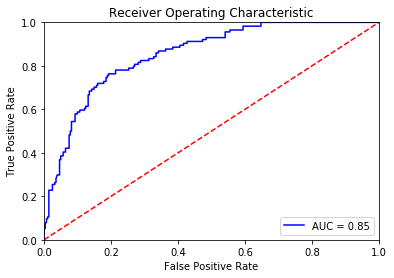

In [94]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
#混淆矩阵
y_pred = model.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[254,  27],
       [ 48,  66]], dtype=int64)

In [96]:
model.coef_

array([[ 1.00594664,  0.50306985, -0.0770232 ,  0.16397937, -0.43191779,
        -0.37623104,  0.01942718,  0.35685312,  0.12247323,  0.26617504,
         0.36504133, -0.1164335 ,  0.607785  , -0.14175799,  0.27261501,
         0.69532483]])

### 评分卡转换

基准分怎么取，不太清楚

In [97]:
A = 650
B = 72.13

In [98]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data

In [99]:
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,TopoPSA,"(62.16, 75.99]",9
1,TopoPSA,"(75.99, 93.06]",58
2,TopoPSA,"(46.53, 62.16]",11
3,TopoPSA,"(12.469000000000001, 46.53]",-100
4,TopoPSA,"(93.06, 1207.82]",87
...,...,...,...
63,nBondsS2,"(50.0, 315.0]",36
64,nBondsS2,"(41.0, 50.0]",56
65,nBondsS2,"(20.0, 30.0]",-19
66,nBondsS2,"(30.0, 41.0]",-16


In [100]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

Variable                Binning  Score
Variable                                           
ATSp2    35     ATSp2  (3157.196, 11960.934]     51
         34     ATSp2   (2763.198, 3157.196]     31
         38     ATSp2     (679.59, 1706.175]     -9
         36     ATSp2   (2268.304, 2763.198]    -10
         37     ATSp2   (1706.175, 2268.304]    -19
...               ...                    ...    ...
nBondsS2 64  nBondsS2           (41.0, 50.0]     56
         63  nBondsS2          (50.0, 315.0]     36
         66  nBondsS2           (30.0, 41.0]    -16
         65  nBondsS2           (20.0, 30.0]    -19
         67  nBondsS2          (9.999, 20.0]    -29

[68 rows x 3 columns]

In [101]:
sort_scorecard.to_csv('./sort_scorecard.csv')